In [16]:
#import kagglehub
#from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
edudf = pd.read_csv('data/International_Education_Costs.csv')
print(edudf.info())
print(edudf.describe())
print(edudf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB
None
       Duration_Years   Tuition_USD  Living_Cost_Index     Rent_USD  \
count      907.000000    907.000000         907.000000   907.000000   
mean         

In [20]:
print(f'The number of nulls in each column: {edudf.columns.isnull().sum()}')
print(f'The number of nas in each columns: {edudf.columns.isna().sum()}')
print(f'The number of unique countries in the Country column: {len(edudf.Country.unique())}')
print(f'The number of unique cities in the City column: {len(edudf.City.unique())}')
print(f'The number of unique universities in the University column: {len(edudf.University.unique())}')
print(f'The number of unique programs in the Program column: {len(edudf.Program.unique())}')
print(f'The number of unique levels in the Level column: {len(edudf.Level.unique())}')


The number of nulls in each column: 0
The number of nas in each columns: 0
The number of unique countries in the Country column: 71
The number of unique cities in the City column: 556
The number of unique universities in the University column: 622
The number of unique programs in the Program column: 92
The number of unique levels in the Level column: 3


In [42]:
#Country-wise and degree-wise cost comparisons
#Define Incountry_Cost: Tuition_USD + (Duration_Years * 12 * Rent_USD ) + (Duration_Years * Insurance_USD)
#Define International_Cost: Visa_Fee_USD + Tuition_USD + (Duration_Years * 12 * Rent_USD ) + (Duration_Years * Insurance_USD)
#Assumptions student is able to 6 month, .5 year, leases and policies, however if student is only able to work in years all durations should use ceiling rounding

edudf['Incountry_Cost'] = edudf['Tuition_USD'] + (edudf['Duration_Years'] * 12 * edudf['Rent_USD']) + (edudf['Duration_Years'] * edudf['Insurance_USD'])
edudf['International_Cost'] = edudf['Visa_Fee_USD'] + edudf['Tuition_USD'] + (edudf['Duration_Years'] * 12 * edudf['Rent_USD']) + (edudf['Duration_Years'] * edudf['Insurance_USD'])

#Create Group By variables to use for analysis
avg_incountry_cost_by_country = edudf.groupby(['Country'])['Incountry_Cost'].mean()
print(type(avg_incountry_cost_by_country))
#avg_incountry_cost_by_country.rename(columns = {"" : "Incountry_Cost"})
avg_incountry_cost_by_degree = edudf.groupby(['Program'])['Incountry_Cost'].mean()
avg_international_cost_by_country = edudf.groupby(['Country'])['Incountry_Cost'].mean()
avg_international_cost_by_degree = edudf.groupby(['Program'])['Incountry_Cost'].mean()

print(avg_incountry_cost_by_country)

<class 'pandas.core.series.Series'>
Country
Algeria         8452.000000
Argentina      13716.666667
Australia      85291.279070
Austria        28983.333333
Bahrain        33856.000000
                  ...      
USA           127588.461538
Ukraine        15976.000000
Uruguay        16688.000000
Uzbekistan     12336.000000
Vietnam        25800.000000
Name: Incountry_Cost, Length: 71, dtype: float64


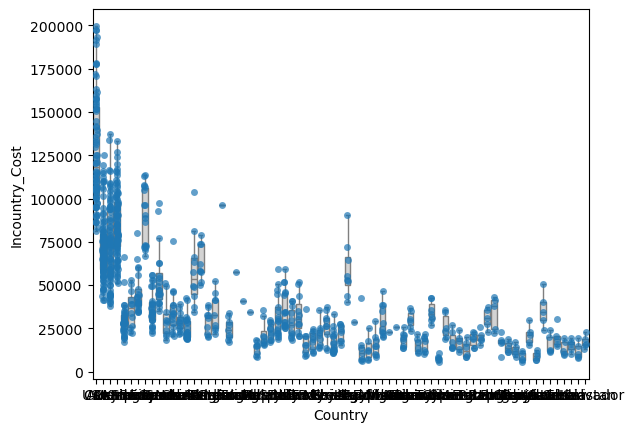

In [30]:
box = sns.boxplot(data=edudf, x = 'Country', y = 'Incountry_Cost', color = 'lightgray', showfliers = False)
scat = sns.stripplot(data = edudf, x = 'Country', y = 'Incountry_Cost', alpha = .7)

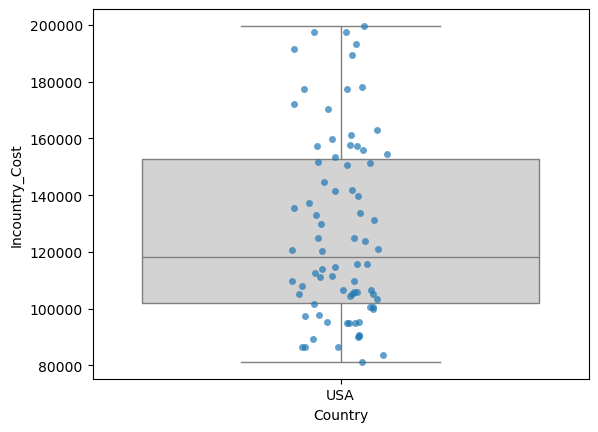

In [34]:
filter = (edudf['Country'].isin(['USA']))
box = sns.boxplot(data=edudf[filter], x = 'Country', y = 'Incountry_Cost', color = 'lightgray', showfliers = False)
scat = sns.stripplot(data = edudf[filter], x = 'Country', y = 'Incountry_Cost', alpha = .7)

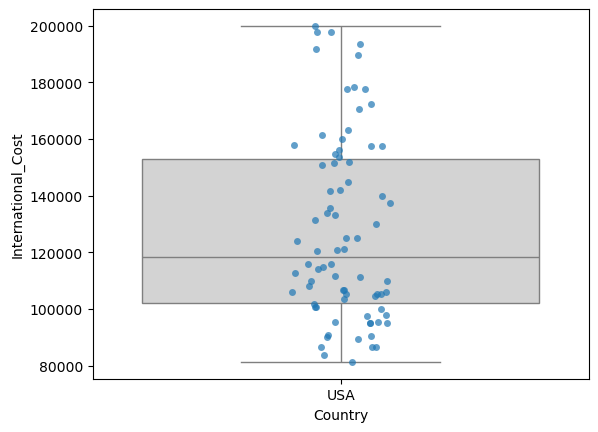

In [33]:
filter = (edudf['Country'].isin(['USA']))
box = sns.boxplot(data=edudf[filter], x = 'Country', y = 'International_Cost', color = 'lightgray', showfliers = False)
scat = sns.stripplot(data = edudf[filter], x = 'Country', y = 'International_Cost', alpha = .7)